# Some common distributions to know

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Discrete distributions

The binomial distribution
$$f(k|n,\theta) = \binom{n}{k}\theta^k(1-\theta)^{n-k}$$
e.g. Toss a coin n times


(0.0, 0.1)

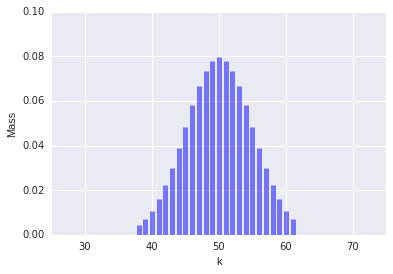

In [89]:
from scipy.stats import binom
n,theta = 100, 0.5
mean, var, skew, kurt = binom.stats(n, theta, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, n, theta), binom.ppf(0.99, n, theta))
ax.vlines(x, 0, binom.pmf(x, n, theta), colors='b', lw=5, alpha=0.5)
plt.ylabel('Mass')
plt.xlabel('k')
plt.xlim(25,75)
plt.ylim(0.0 ,.1)

The bernoulli distribution

\begin{align*}
  f(x|\theta) = 
  \begin{cases}
      \theta & \text{if $x=1$} \\ 
      1-\theta & \text{if $x=0$}
    \end{cases}
\end{align*}
e.g. Toss a coin once

(0.0, 1)

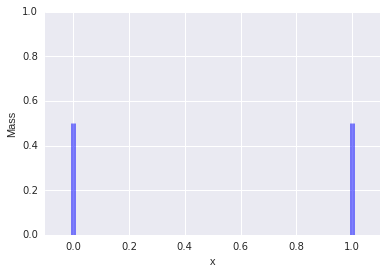

In [56]:
from scipy.stats import bernoulli
theta = 0.5
mean, var, skew, kurt = bernoulli.stats(theta, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.arange(0,1.1)
ax.vlines(x, 0, bernoulli.pmf(x, theta), colors='b', lw=5, alpha=0.5)
plt.ylabel('Mass')
plt.xlabel('x')
plt.xlim(-0.1 ,1.1)
plt.ylim(0.0 ,1)

The multinomial distribution
$$f(x|n,\theta) = \binom{n}{x_1 \ldots x_K}\prod^{K}_{j=1}\theta^{x_j}_j$$
e.g. Roll a K-sided die n times

In [61]:
#from scipy.stats import multinomial $ waiting until scipy 0.19 is released
x = np.arange(0,6)
theta = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
n = 100 # number of  trials
mean, var, skew, kurt = multinomial.stats(theta, moments='mvsk')
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, multinomial.pmf(x, theta), colors='b', lw=5, alpha=0.5)
plt.ylabel('Mass')
plt.xlabel('x')
plt.xlim(-0.1 ,1.1)
plt.ylim(0.0 ,1)

NameError: name 'multinomial' is not defined

The poisson distribution
$$f(x|\theta) = e^{-\lambda} \frac{\lambda^x}{x!}$$
e.g. rare events, radioactive decay, Trump saying something coherent


(0.0, 1)

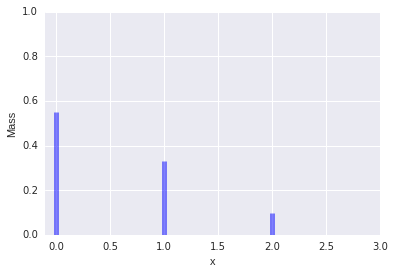

In [79]:
from scipy.stats import poisson
lambda_ = 0.6
mean, var, skew, kurt = poisson.stats(lambda_, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.arange(0,3)
ax.vlines(x, 0, poisson.pmf(x, lambda_), colors='b', lw=5, alpha=0.5)
plt.ylabel('Mass')
plt.xlabel('x')
plt.xlim(-0.1 ,3)
plt.ylim(0.0 ,1)

The emperical distribution
$$f(A) = \frac{1}{N}\sum^{N}_{i=1}\delta_{x_{i}}(A)$$
\begin{align*}
  \delta_{x_{i}}(A) = 
  \begin{cases}
      0 & \text{if $x\notin A$} \\ 
      1 & \text{if $x\in A$}
    \end{cases}
\end{align*}

## Continuous Distributions

Gaussian (normal)
$$f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$

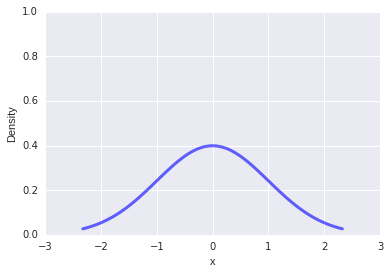

In [99]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'b-', lw=3, alpha=0.6, label='norm pdf')
plt.xlim(-3 ,3)
plt.ylim(0.0 ,1)
plt.ylabel('Density')
plt.xlabel('x')

Students t (special cases cauchy lorentz)
$$ f(x|v) = \frac{\Gamma(\frac{v+1}{2})}{\sqrt{v\pi}\Gamma(\frac{v}{2})} \Big( 1+\frac{x^2}{v} \Big)^{-\frac{v+1}{2}}, v= df $$  

e.g. scienceing

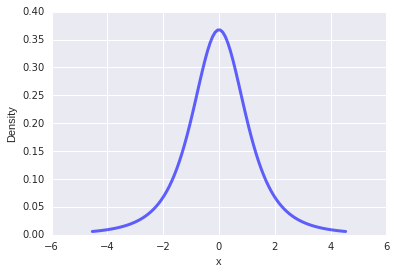

In [100]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
df = 3
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),
              t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
         'b-', lw=3, alpha=0.6, label='t pdf')
plt.ylabel('Density')
plt.xlabel('x')

Laplace
$$ f(x|\mu,b) = \frac{1}{2b}e^{\big(-\frac{|x-\mu|)}{b}\big)}$$
e.g. like normal but with more sparsity, brownian motion

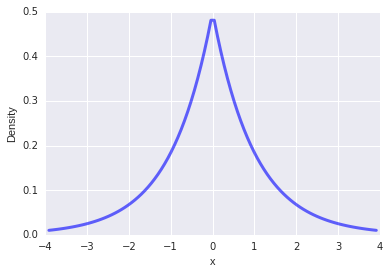

In [119]:
from scipy.stats import laplace

mean, var, skew, kurt = laplace.stats(moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.linspace(laplace.ppf(0.01),
                laplace.ppf(0.99), 100)
ax.plot(x, laplace.pdf(x),
       'b-', lw=3, alpha=0.6, label='laplace pdf')
plt.ylabel('Density')
plt.xlabel('x')

Gamma
$$ f(x|a,b) = \frac{b^a}{\Gamma(a)}x^{a-1}e^{-xb} $$, where the shape a >0, and the rate b >0 

e.g. 

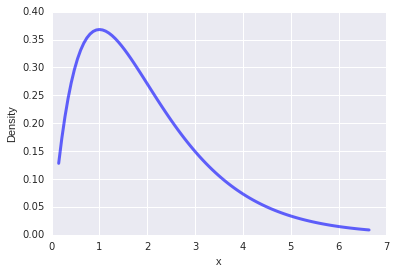

In [120]:
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)
a = 2
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'b-', lw=3, alpha=0.6, label='gamma pdf')
plt.ylabel('Density')
plt.xlabel('x')

The beta distribution
$$f(x|a,b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$$
$$B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$


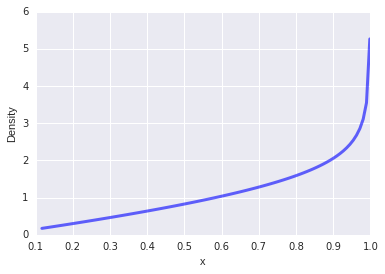

In [121]:
from scipy.stats import beta
a, b = 2, 0.8
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'b-', lw=3, alpha=0.6, label='beta pdf')
plt.ylabel('Density')
plt.xlabel('x')

pareto
\begin{align*}
  f(x| k,m) = 
  \begin{cases}
      \frac{kx_m^k}{x^{k+1}} & \text{if $x \ge x_m$} \\ 
      0 & \text{if $x < x_m$}
    \end{cases}
\end{align*}


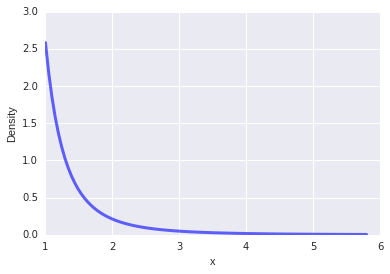

In [122]:
from scipy.stats import pareto
fig, ax = plt.subplots(1, 1)
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'b-', lw=3, alpha=0.6, label='pareto pdf')
plt.ylabel('Density')
plt.xlabel('x')

The multivariate Gaussian
$$f(x|\mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}e^{\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$$


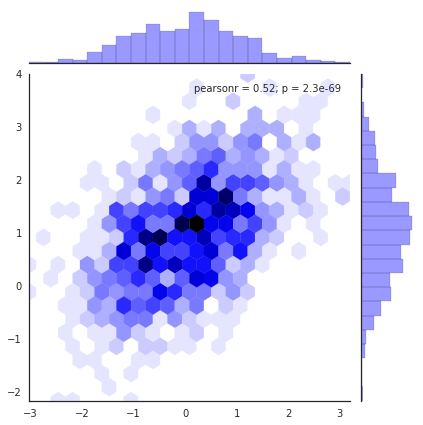

In [130]:
from scipy.stats import multivariate_normal
mean, cov = [0, 1], [(1, .5), (.5, 1)]

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="b");


The Dirichlet distribution
$$f(x|\alpha) = \frac{1}{B(\alpha)}\prod_{k=1}^{K}x_k^{\alpha_k-1}I(x\in S_k)$$
$$B(\alpha) = \frac{\prod_{k=1}^{K}\Gamma(\alpha_k)}{\Gamma(\alpha_0)}$$
e.g. multivariate generalization of beta distribution

Wrote plots to "dirichlet_plots.png".


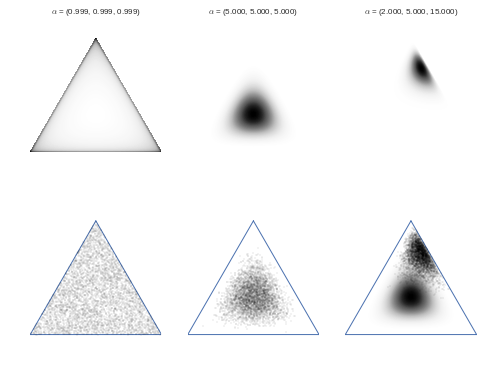

In [137]:
#The code below to visualize was taken from Thomas boggs elegant contours here:http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
import matplotlib.tri as tri

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.

    Arguments:

        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).

    Arguments:

        `dist`: A distribution instance with a `pdf` method.

        `border` (bool): If True, the simplex border is drawn.

        `nlevels` (int): Number of contours to draw.

        `subdiv` (int): Number of recursive mesh subdivisions to create.

        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.

    Arguments:

        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.

        `barycentric` (bool): Indicates if `X` is in barycentric coords.

        `border` (bool): If True, the simplex border is drawn.

        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

if __name__ == '__main__':
    f = plt.figure(figsize=(8, 6))
    alphas = [[0.999] * 3,
              [5] * 3,
              [2, 5, 15]]
    for (i, alpha) in enumerate(alphas):
        plt.subplot(2, len(alphas), i + 1)
        dist = Dirichlet(alpha)
        draw_pdf_contours(dist)
        title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
        plt.title(title, fontdict={'fontsize': 8})
        plt.subplot(2, len(alphas), i + 1 + len(alphas))
        plot_points(dist.sample(5000))

    print 'Wrote plots to "dirichlet_plots.png".'


draw_pdf_contours(Dirichlet([5, 5, 5]))

    

In [ ]:
multivariate student